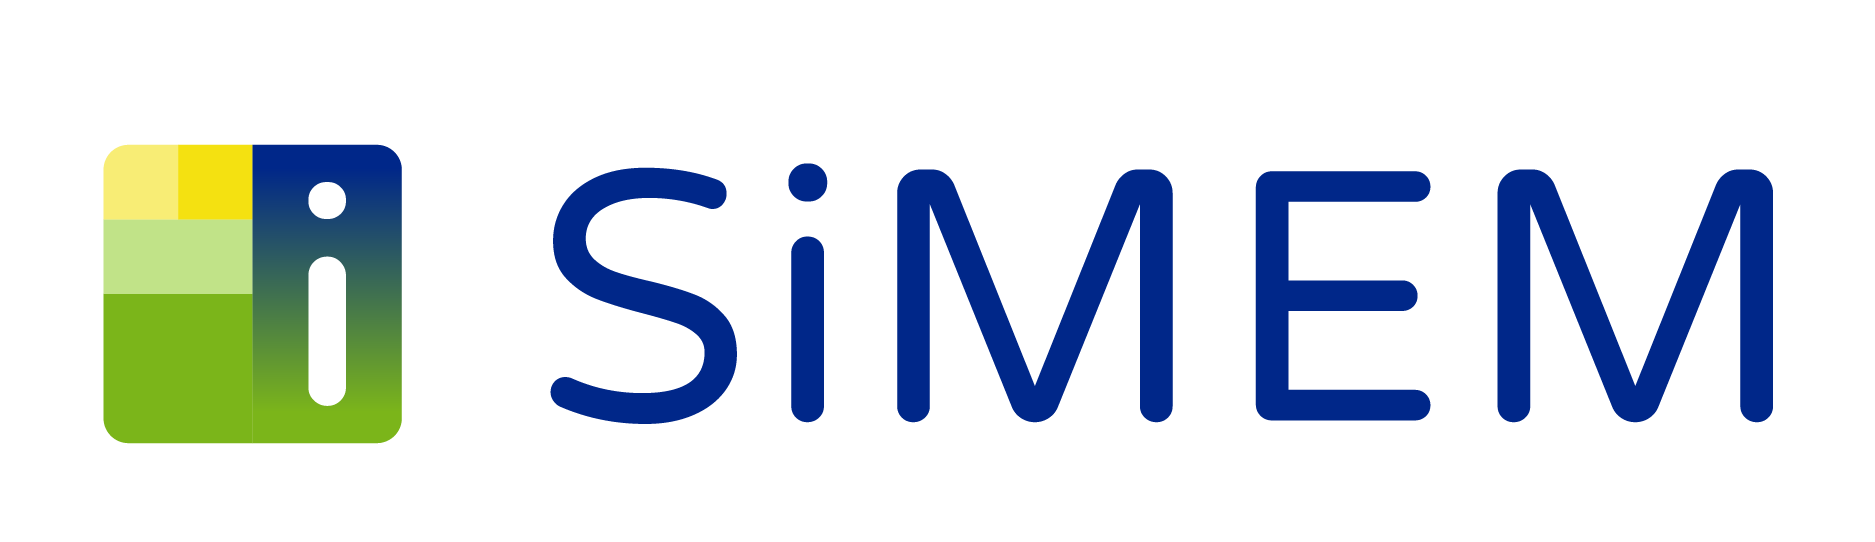

[SiMEM](https://www.simem.co/)

## Objetivos de este Notebook

* Explicar cómo consultar la información de un conjunto de datos determinado.
* Presentar un caso de uso para la información publicada en SIMEM.
* Demostrar cómo hacer filtros especializados en un conjunto de datos determinado.

>**Caso de uso - Comportamiento Aportes Hídricos en Energía **  
>Se presentarán los aportes en un rango de tiempo elegido.

### Carga del objeto PyDataSimem

En la siguiente celda se importa el objeto PyDataSimem, que contiene el método para consultar los conjuntos de datos de SiMEM

In [227]:
from pydataxm import pydataxm

### Importación de librerías


In [228]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

### Consultar información de un conjunto de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Los conjuntos a presentar serán [Aportes Hídricos en Energía](https://www.simem.co/datadetail/BA1C5513-7DC3-4155-9DE9-D262863B31F3) desde Abril 2024 hasta junnio 2024.

Se definen los parámetros de entrada y se crea el objeto para realizar las consultas.

In [247]:
id_dataset_aportes = 'BA1C55'
id_dataset_reservas = 'c51127'
fecha_inicial = '2024-04-15'
fecha_final = '2024-04-14'
simem = pydataxm.ReadSIMEM()

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [248]:
df_aportes = simem.main(id_dataset_aportes, fecha_inicial, fecha_final)
df_reservas = simem.main(id_dataset_reservas, fecha_inicial, fecha_final)
display(df_aportes)
display (df_reservas)

""


""


In [249]:
df_aportes = df_aportes.sort_values(by='Fecha')
#df_reservas = df_reservas.sort_values(by='Fecha')

display(df_aportes)
#display(df_reservas)

KeyError: 'Fecha'

### Interpretación de conjuntos de datos
Cada conjunto de datos tiene diferentes variables, las cuales se encuentran en la sección **ver detalle de variable** de cada conjunto de datos, donde también se pueden ver las características de las columnas que constituyen el conjunto.

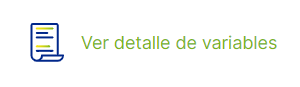

In [ ]:
filtro_aportes = 'Colombia'
filtro_reservas = 'AGREGADO'

Los dataframes se filtaran para tener los datos necesarios para la visualización, eligiendo el código de variable y de una vez organizando por fecha.

In [ ]:
df_filtrado_aportes = df_aportes.loc[df_aportes['RegionHidrologica'] == filtro_aportes, ['Fecha', 'AportesHidricosEnergia']]
df_filtrado_aportes['AportesHidricosEnergia']=df_filtrado_aportes['AportesHidricosEnergia']/1000000

df_filtrado_reservas = df_reservas.loc[df_reservas['CodigoEmbalse'] == filtro_reservas, ['Fecha', 'VolumenUtilDiarioEnergia']]
df_filtrado_reservas['VolumenUtilDiarioEnergia']=df_filtrado_reservas['VolumenUtilDiarioEnergia']/1000000

display(df_filtrado_reservas)




,Fecha,VolumenUtilDiarioEnergia
814,2024-04-15,2109.2497
789,2024-04-16,2102.9399
776,2024-04-17,2096.6391
742,2024-04-18,2092.8051
715,2024-04-19,2088.7797
679,2024-04-20,2085.7428
658,2024-04-21,2103.5900
641,2024-04-22,2087.6353
616,2024-04-23,2087.8401
582,2024-04-24,2087.4527


### Manipulación de datos
El siguiente paso es seleccionar solamente la información realmente importante para el análisis. Los pasos a realizar para preparar la información son:
- La columna fecha se define como fecha.
- Se calcula el promedio aritmético por día para precio de bolsa.
- Se eligen las columnas a graficar.

### Gráfica en el tiempo
Ahora se realiza la presentación visual de los datos del comportamiento de los precios de bolsa y escasez de activación desde Abril 2023 a Abril 2024.

C:\Users\50547\AppData\Local\Temp\ipykernel_19060\3381569740.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\50547\AppData\Local\Temp\ipykernel_19060\3381569740.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


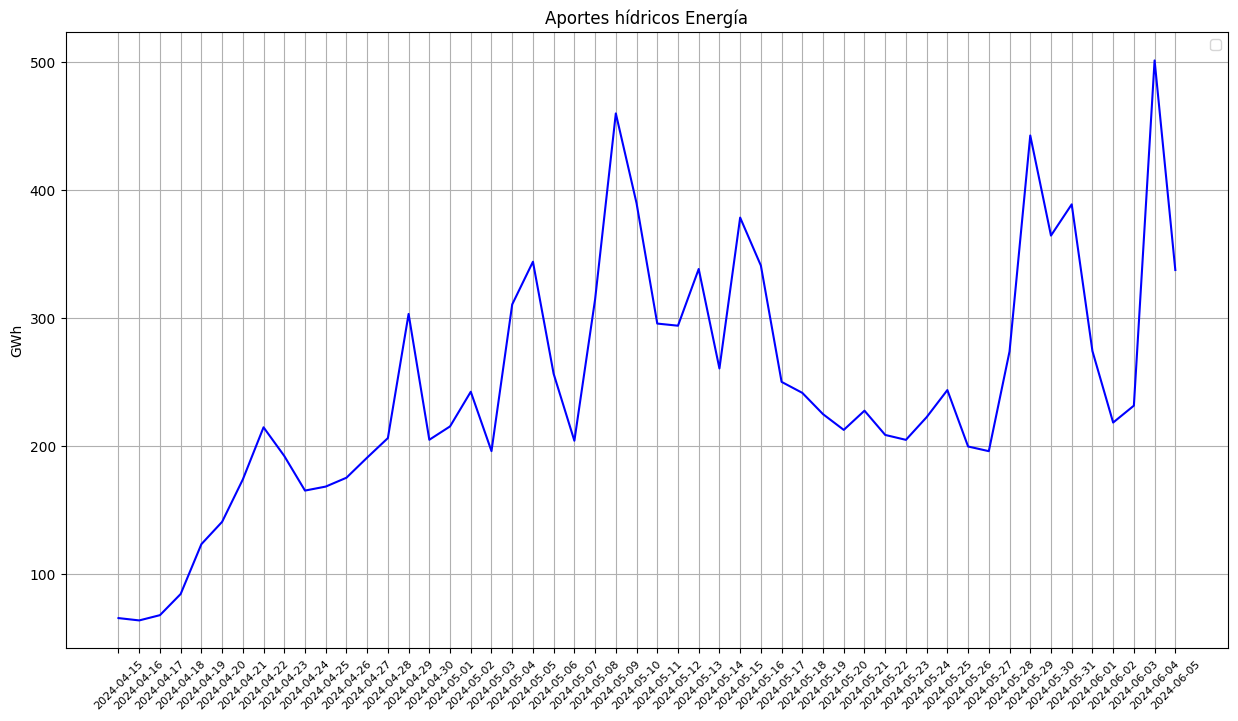

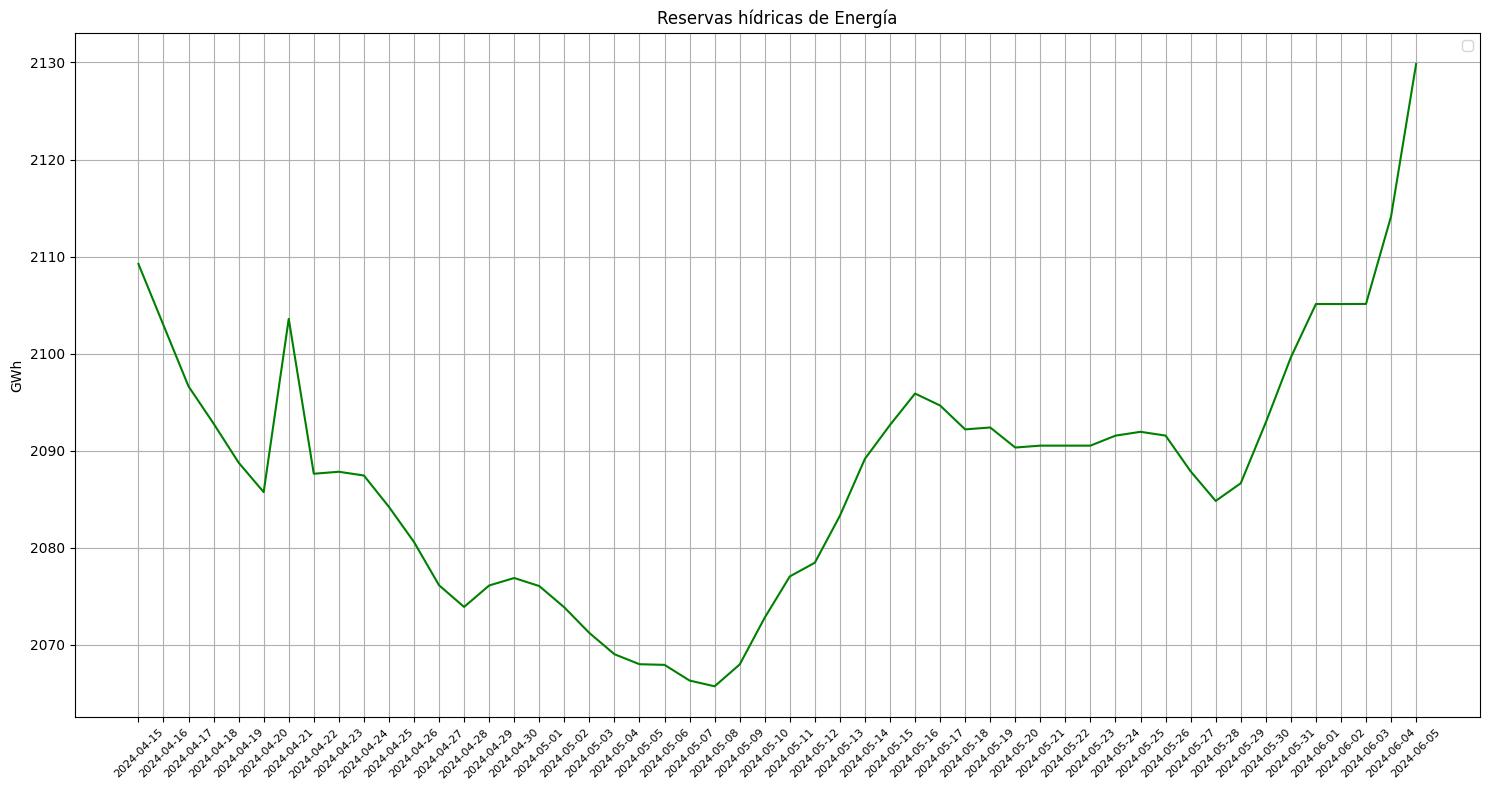

In [ ]:
x_axis = 'Fecha'
y_axis_ap = 'Aportes_energia'
y_axis_re = 'Reservas energía'

def graficar() -> None:

    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado_aportes['Fecha'],df_filtrado_aportes['AportesHidricosEnergia'],  color='blue')
    plt.ylabel('GWh')
    plt.title('Aportes hídricos Energía')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, fontsize=8)

    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado_reservas['Fecha'],df_filtrado_reservas['VolumenUtilDiarioEnergia'],  color='green')
  

    #plt.xlabel('Fecha')
    plt.ylabel('GWh')
    plt.title('Reservas hídricas de Energía')
    plt.legend()
    plt.grid(True)

   # plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%b %Y'))
   # plt.gca().xaxis.set_major_locator(mpl_dates.MonthLocator())

    plt.xticks(rotation=45, fontsize=8)

    plt.tight_layout()
    plt.show()
    return None


graficar()
